In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/boss/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [49]:
data=pd.read_csv("/home/boss/Documents/datasets/house-prices-advanced-regression-techniques/train.csv")
data.head(15)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [50]:
test_data=pd.read_csv("/home/boss/Documents/datasets/house-prices-advanced-regression-techniques/test.csv")
test_data=test_data.drop("Id",axis=1)
Y_val=pd.read_csv("/home/boss/Documents/datasets/house-prices-advanced-regression-techniques/sample_submission.csv")

Y_val=Y_val.drop("Id",axis=1)
print(test_data.shape,Y_val.shape)

(1459, 79) (1459, 1)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
data=data.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
# data=data.drop('Id',axis=1)
# data=data.drop('Alley',axis=1,inplace=True)
# data=data.drop('PoolQC',axis=1,inplace=True)
# data=data.drop('Fence',axis=1,inplace=True)
# data=data.drop('MiscFeature',axis=1,inplace=True)


In [52]:

test_data.drop('Alley',axis=1,inplace=True)
test_data.drop('PoolQC',axis=1,inplace=True)
test_data.drop('Fence',axis=1,inplace=True)
test_data.drop('MiscFeature',axis=1,inplace=True)

In [53]:
# data.isnull().sum()[data.isnull().sum()!=0]
data.shape

(1460, 76)

In [54]:
test_data.shape

(1459, 75)

In [55]:
numeric_cols=[x for x in data.columns.tolist() if data[x].dtype!='object']
categorical_cols=[x for x in data.columns.tolist() if data[x].dtype=='object']
len(categorical_cols)

39

In [8]:
data[numeric_cols].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
np.sort(data.GarageYrBlt.unique())

array([1900., 1906., 1908., 1910., 1914., 1915., 1916., 1918., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010.,   nan])

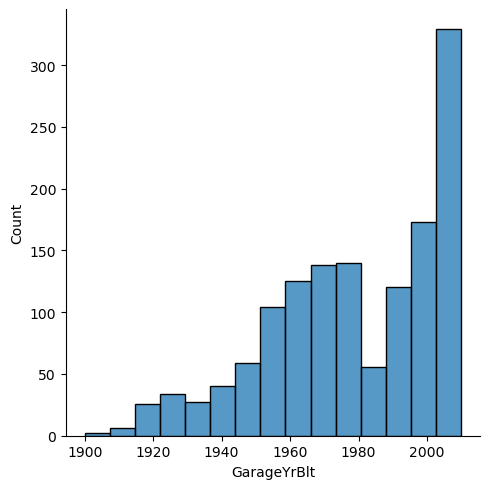

In [10]:
sns.displot(data.GarageYrBlt)

In [56]:
sns.distplot(data["MasVnrArea"])

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

In [12]:
# data['Alley']=np.where((data["Alley"].isnull()),"No_Alley",data["Alley"])


In [13]:
# data['MiscFeature']=np.where((data["MiscFeature"].isnull()),"None",data["MiscFeature"])


In [14]:
# data['Fence']=np.where((data["Fence"].isnull()),"No_Fence",data["Fence"])

In [15]:
# data['PoolQC']=np.where((data["PoolQC"].isnull()),"No_Pool",data["PoolQC"])


In [57]:
data['FireplaceQu']=np.where((data["FireplaceQu"].isnull()),"No_Fireplace",data["FireplaceQu"])

test_data['FireplaceQu']=np.where((test_data["FireplaceQu"].isnull()),"No_Fireplace",test_data["FireplaceQu"])


In [58]:
data['GarageType']=np.where((data["GarageType"].isnull()),"No_Garage",data["GarageType"])
test_data['GarageType']=np.where((test_data["GarageType"].isnull()),"No_Garage",test_data["GarageType"])


In [59]:
data["GarageYrBlt"]=np.where((data["GarageYrBlt"].isnull()),0,data["GarageYrBlt"])
test_data['GarageYrBlt']=np.where((test_data["GarageYrBlt"].isnull()),0,test_data["GarageYrBlt"])


In [60]:
data['GarageFinish']=np.where((data["GarageFinish"].isnull()),"No_Garage",data["GarageFinish"])

test_data['GarageFinish']=np.where((test_data["GarageFinish"].isnull()),'No_Garage',test_data["GarageFinish"])


In [61]:
data['GarageCond']=np.where((data["GarageCond"].isnull()),"No_Garage",data["GarageCond"])
test_data['GarageCond']=np.where((test_data["GarageCond"].isnull()),'No_Garage',test_data["GarageCond"])


In [62]:
data['GarageQual']=np.where((data["GarageQual"].isnull()),"No_Garage",data["GarageQual"])
test_data['GarageQual']=np.where((test_data["GarageQual"].isnull()),'No_Garage',test_data["GarageQual"])


In [63]:
data["BsmtQual"]=np.where((data["BsmtQual"].isnull()),"No_Bsmt",data["BsmtQual"])
test_data['BsmtQual']=np.where((test_data["BsmtQual"].isnull()),'No_Bsmt',test_data["BsmtQual"])


In [64]:
data["BsmtCond"]=np.where((data["BsmtCond"].isnull()),"No_Bsmt",data["BsmtCond"])
test_data['BsmtCond']=np.where((test_data["BsmtCond"].isnull()),'No_Bsmt',test_data["BsmtCond"])


In [65]:
data["BsmtExposure"]=np.where((data["BsmtExposure"].isnull()),"No_Bsmt",data["BsmtExposure"])
test_data['BsmtExposure']=np.where((test_data["BsmtExposure"].isnull()),'No_Bsmt',test_data["BsmtExposure"])


In [66]:
data["BsmtFinType2"]=np.where((data["BsmtFinType2"].isnull()),"No_Bsmt",data["BsmtFinType2"])
data["BsmtFinType1"]=np.where((data["BsmtFinType1"].isnull()),"No_Bsmt",data["BsmtFinType1"])

test_data['BsmtFinType2']=np.where((test_data["BsmtFinType2"].isnull()),'No_Bsmt',test_data["BsmtFinType2"])
test_data['BsmtFinType1']=np.where((test_data["BsmtFinType1"].isnull()),'No_Bsmt',test_data["BsmtFinType1"])



In [67]:
data["MasVnrType"].fillna(value='None',inplace=True)
test_data["MasVnrType"].fillna(value='None',inplace=True)

In [68]:
data.shape,test_data.shape

((1460, 76), (1459, 75))

In [69]:
data["MasVnrArea"].fillna(value=0,inplace=True)
test_data["MasVnrArea"].fillna(value=0,inplace=True)

In [70]:
upper_l=data.LotFrontage.quantile(0.96)
lower_l=data.LotFrontage.quantile(0.04)
print(upper_l,lower_l)
data["LotFrontage"]=np.where(data["LotFrontage"]>=upper_l,upper_l,np.where(data["LotFrontage"]<=lower_l,lower_l,data["LotFrontage"]))

110.0 32.0


In [71]:
data["LotFrontage"]=data.LotFrontage.fillna(data.LotFrontage.mean())

In [72]:
upper_l=test_data.LotFrontage.quantile(0.96)
lower_l=test_data.LotFrontage.quantile(0.04)
print(upper_l,lower_l)
test_data["LotFrontage"]=np.where(test_data["LotFrontage"]>=upper_l,upper_l,np.where(test_data["LotFrontage"]<=lower_l,lower_l,test_data["LotFrontage"]))

110.0 24.0


In [73]:
test_data["LotFrontage"]=test_data.LotFrontage.fillna(test_data.LotFrontage.mean())

In [74]:
test_data.shape

(1459, 75)

In [75]:
test_data=test_data.drop(test_data[test_data['Utilities'].isnull()].index, axis=0)


In [76]:
test_data.shape

(1457, 75)

In [77]:

test_data=test_data.drop(test_data[test_data['MSZoning'].isnull()].index, axis=0)


In [78]:
test_data=test_data.drop(test_data[test_data['Exterior1st'].isnull()].index, axis=0)

In [79]:
test_data=test_data.drop(test_data[test_data['BsmtFinSF1'].isnull()].index, axis=0)

In [80]:
test_data=test_data.drop(test_data[test_data['BsmtFullBath'].isnull()].index, axis=0)
test_data=test_data.drop(test_data[test_data['KitchenQual'].isnull()].index, axis=0)
test_data=test_data.drop(test_data[test_data['Functional'].isnull()].index, axis=0)
test_data=test_data.drop(test_data[test_data['GarageCars'].isnull()].index, axis=0)
test_data=test_data.drop(test_data[test_data['SaleType'].isnull()].index, axis=0)


In [81]:
test_data.shape,data.shape

((1447, 75), (1460, 76))

In [82]:
test_data=test_data.reset_index(drop=True)

# test_data=test_data.reset_index()

In [83]:
test_data.shape,data.shape

((1447, 75), (1460, 76))

In [30]:
data.corr()[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
MSSubClass,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886
LotFrontage,0.154787,0.050549,0.155002,0.335630,0.386181,0.071091
LotArea,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986
OverallQual,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493
OverallCond,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942
YearBuilt,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308
YearRemodAdd,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024
MasVnrArea,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800
BsmtFinSF1,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079
BsmtFinSF2,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260


/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


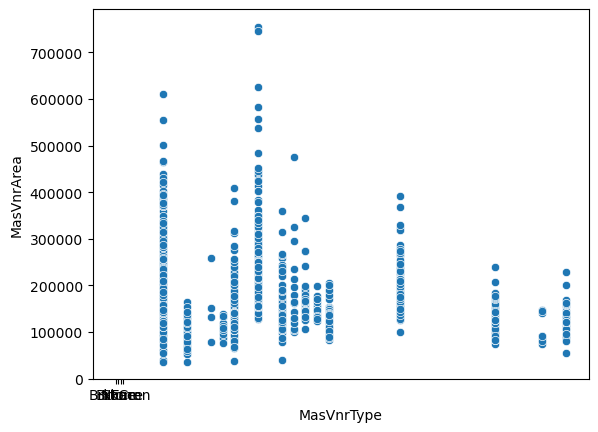

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


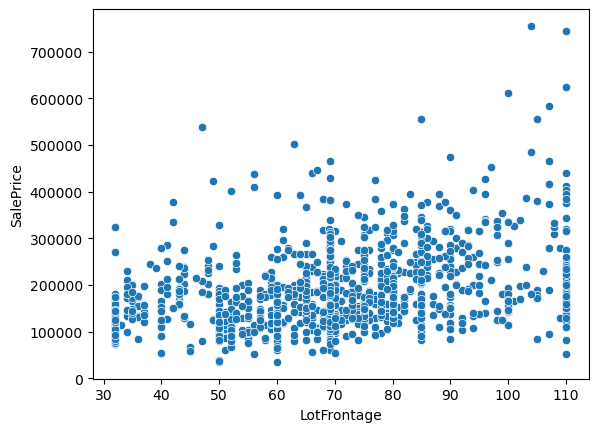

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


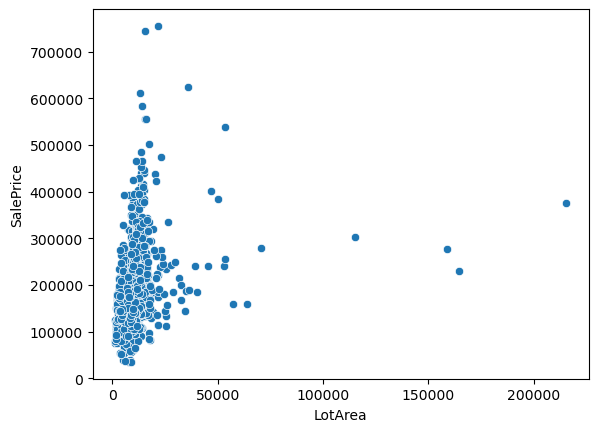

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


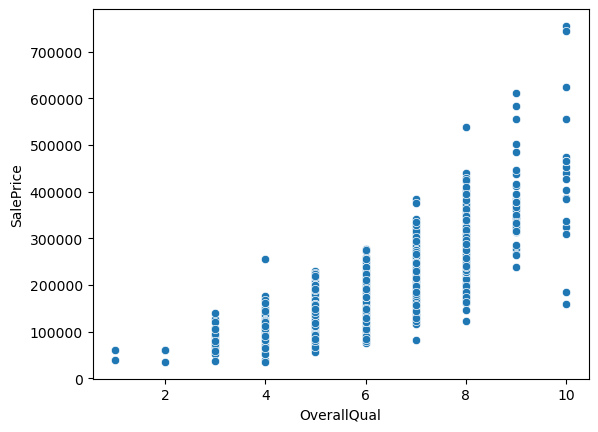

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


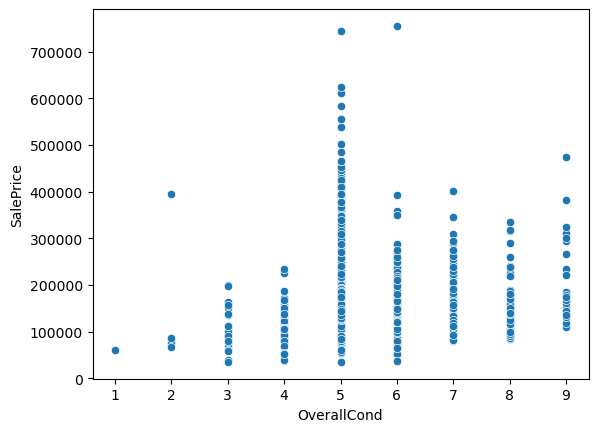

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


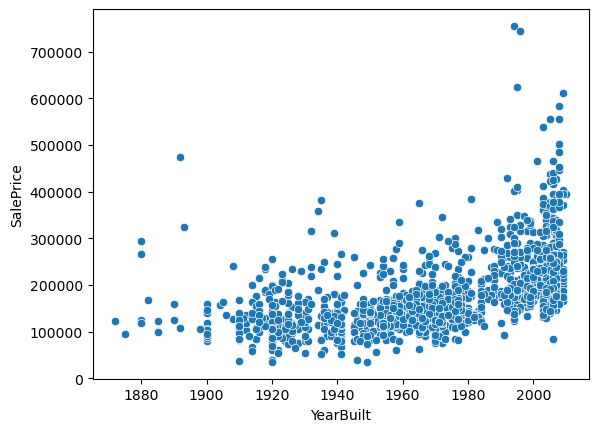

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


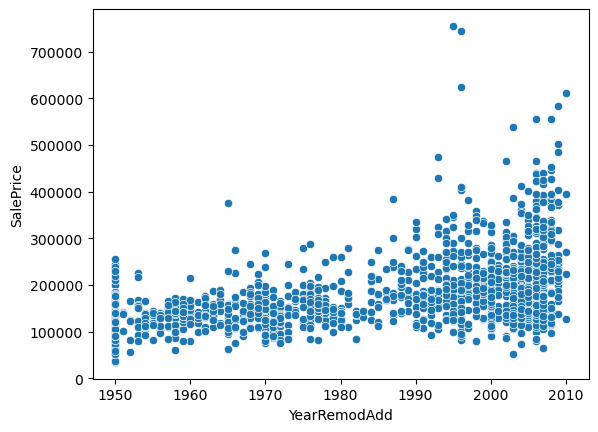

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


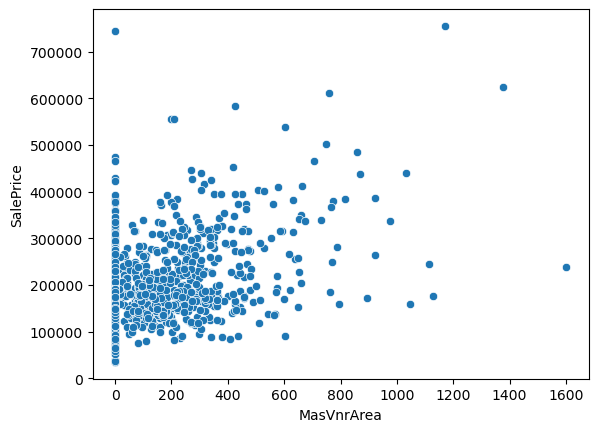

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


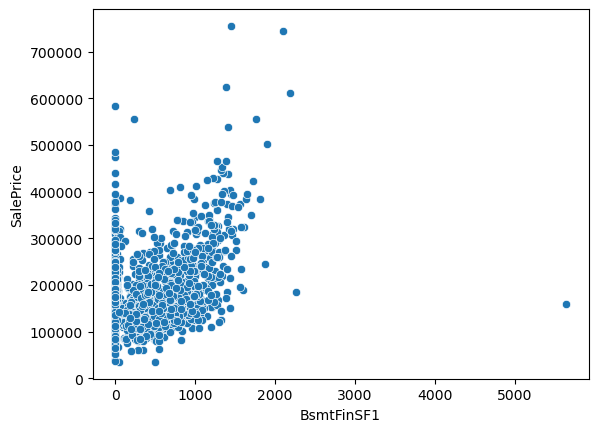

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


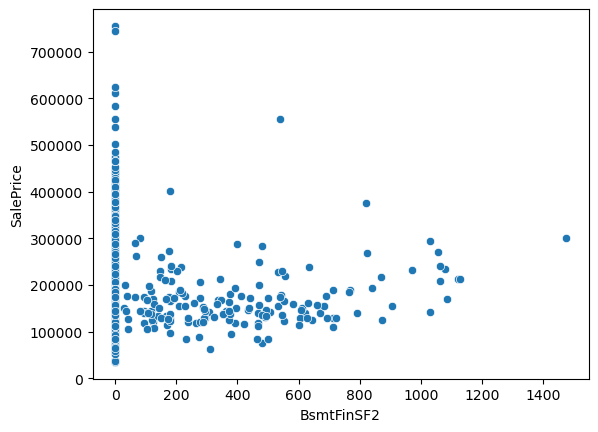

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


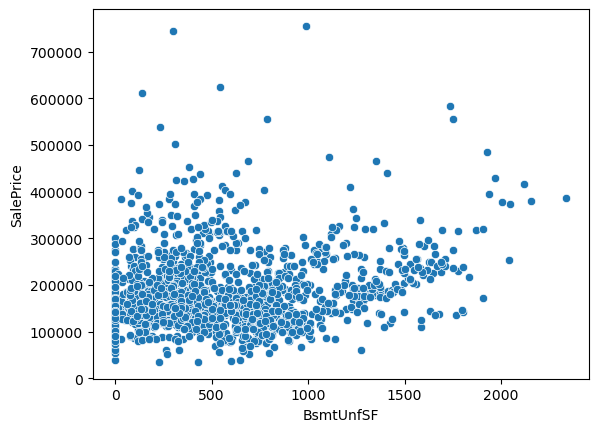

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


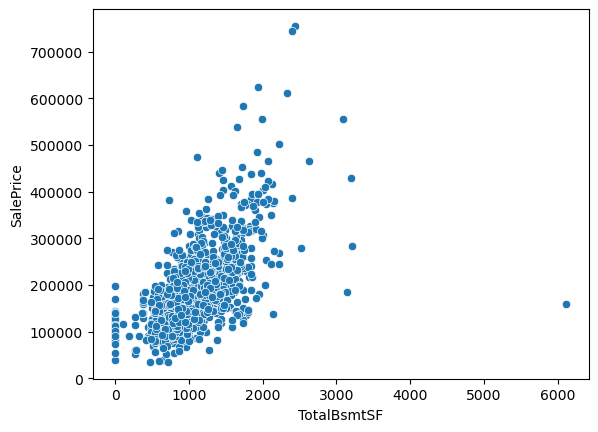

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


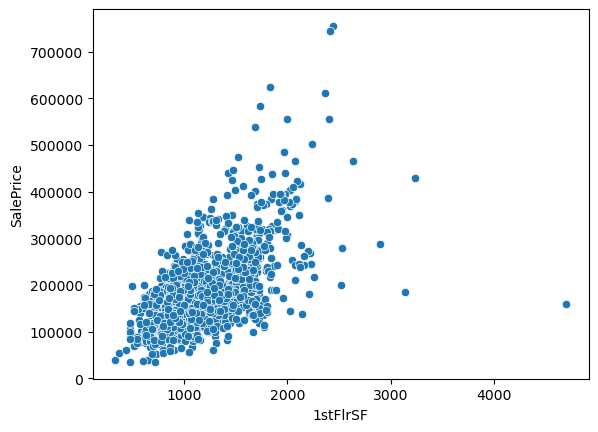

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


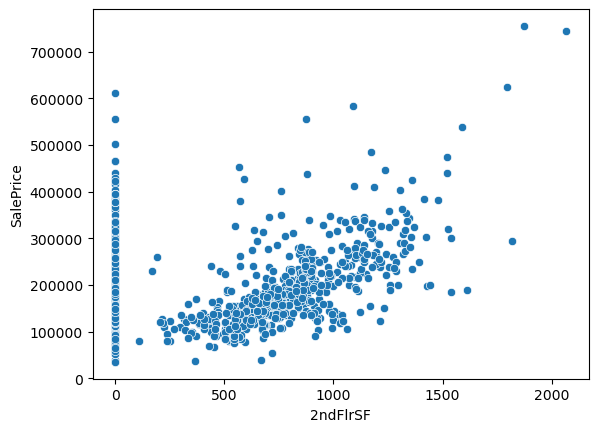

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


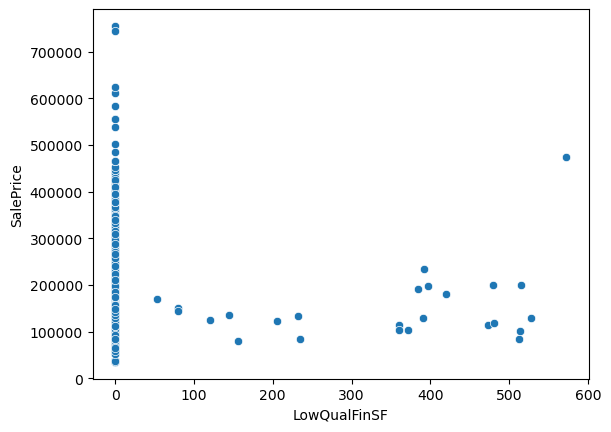

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


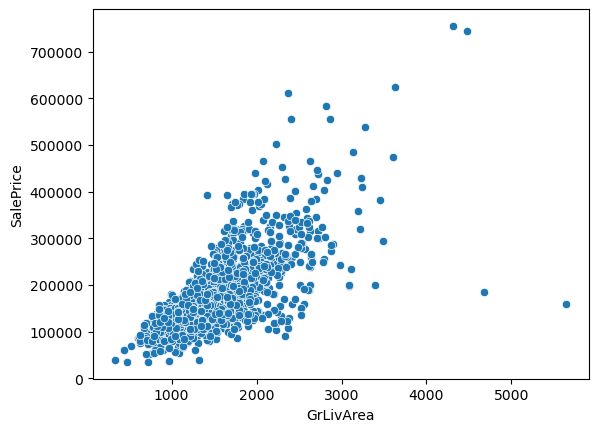

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


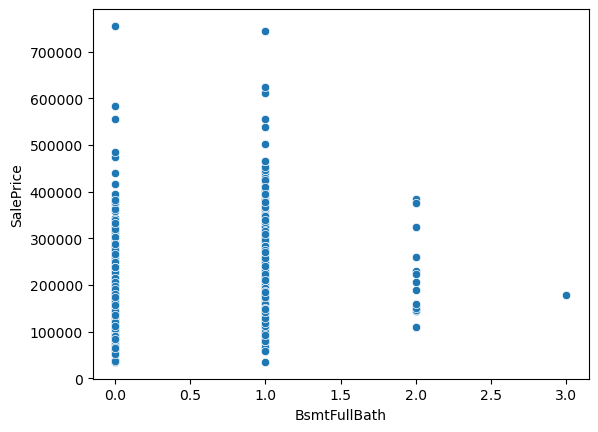

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


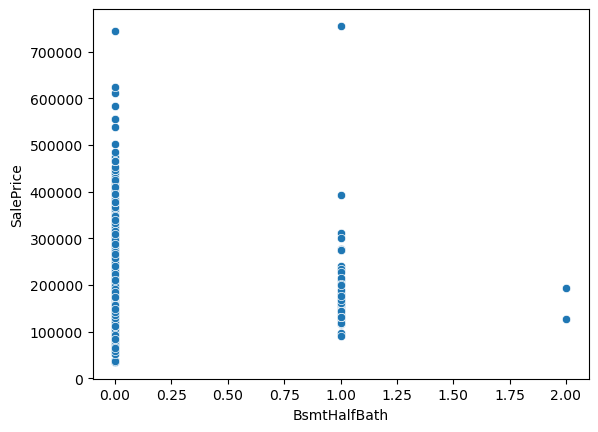

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


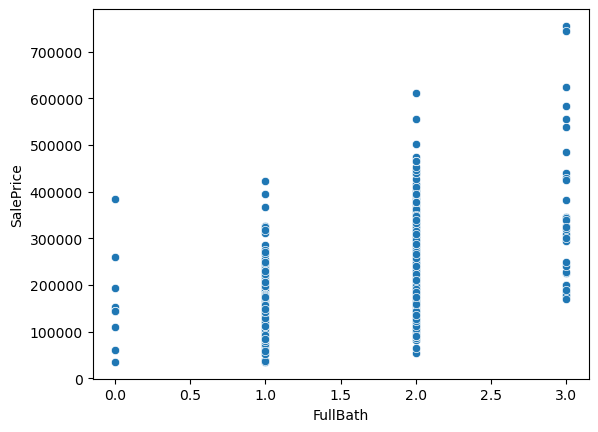

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


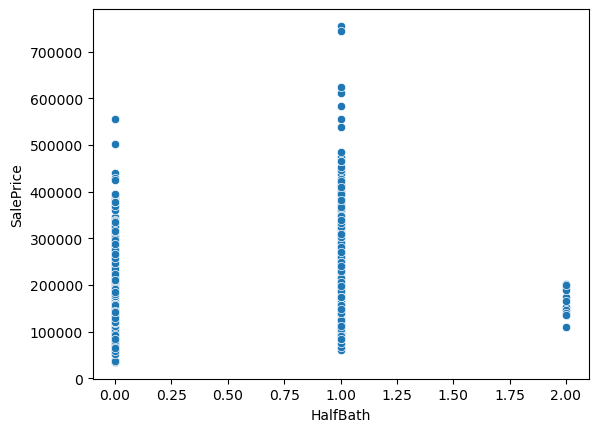

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


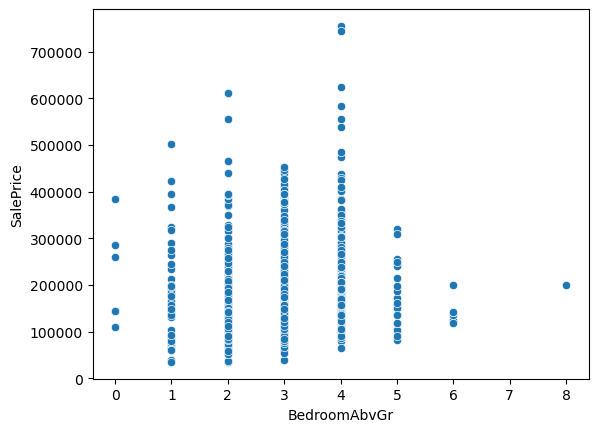

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


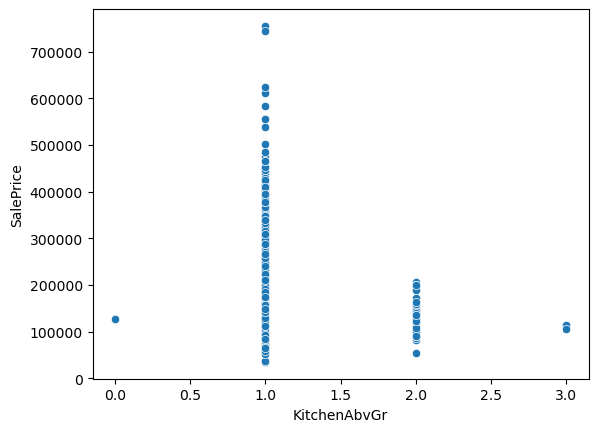

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


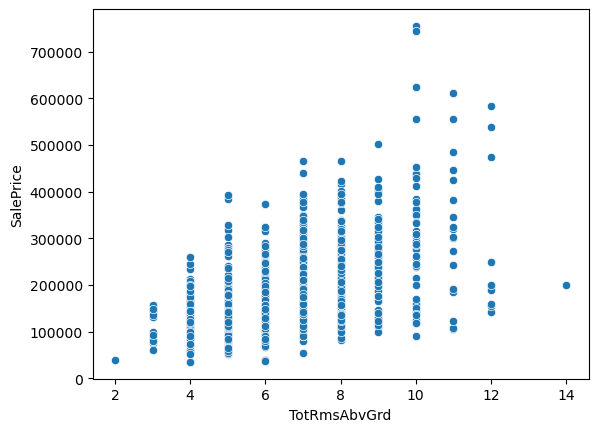

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


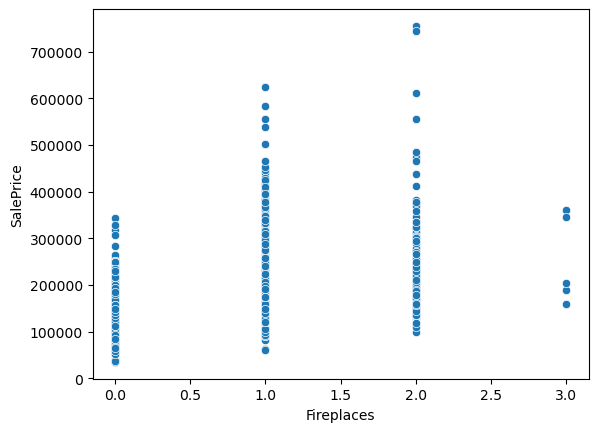

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


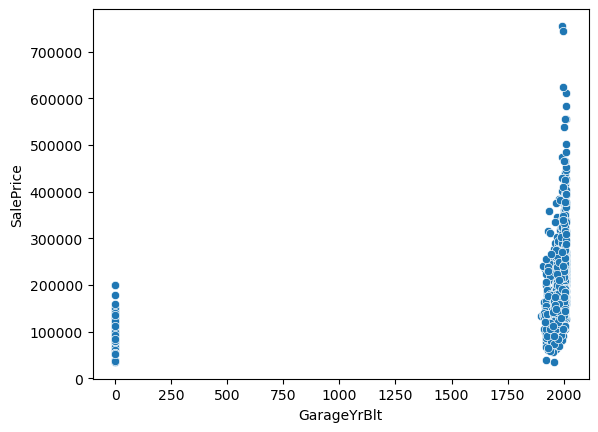

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


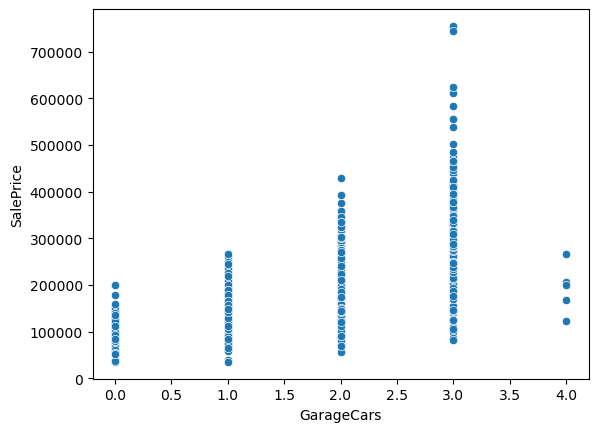

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


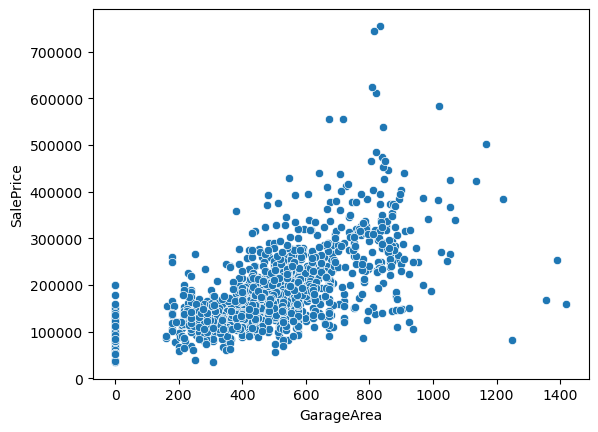

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


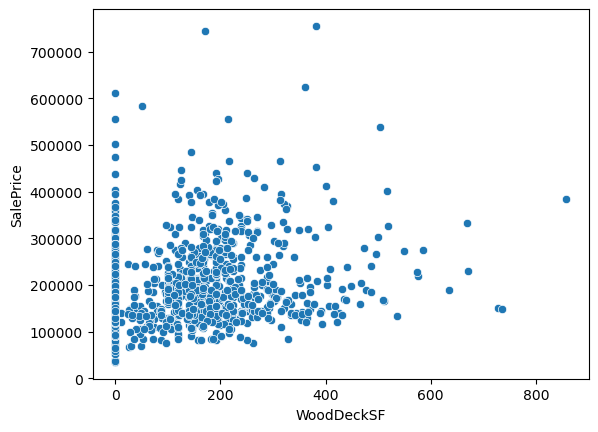

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


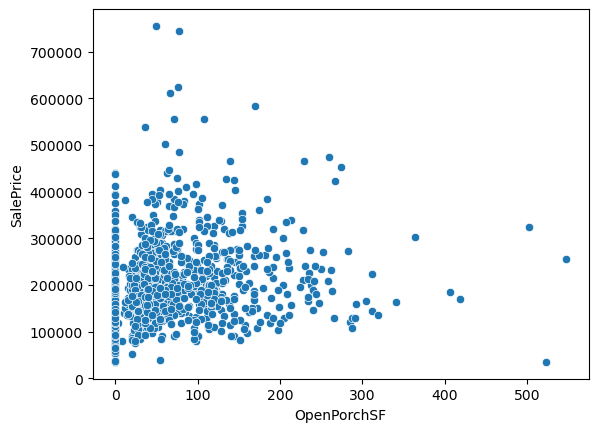

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


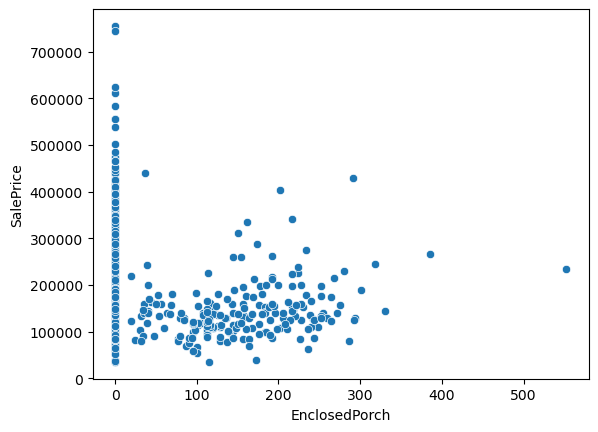

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


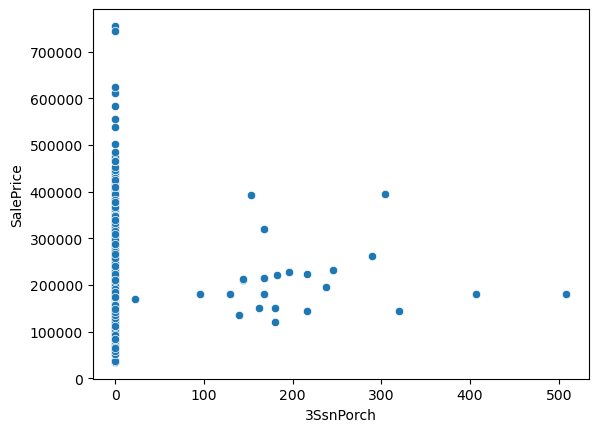

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


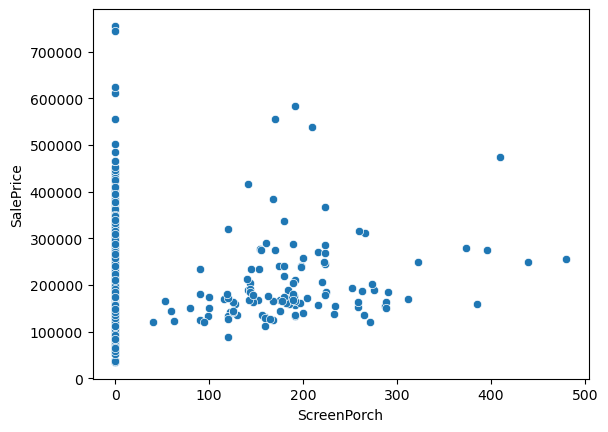

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


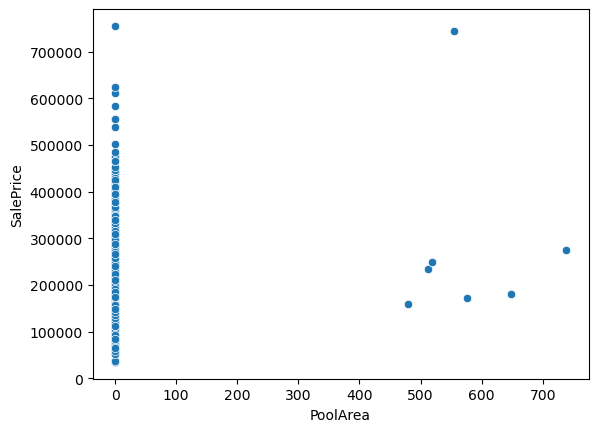

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


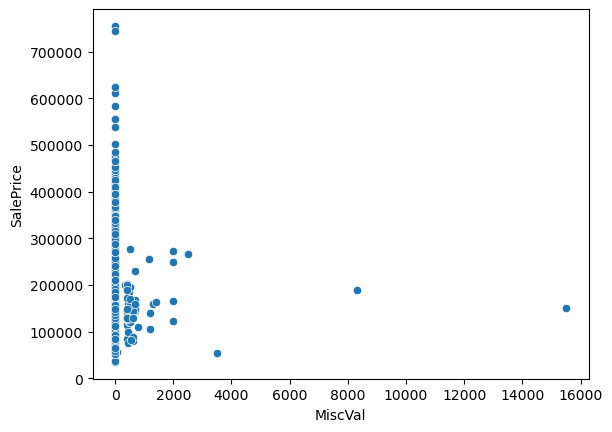

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


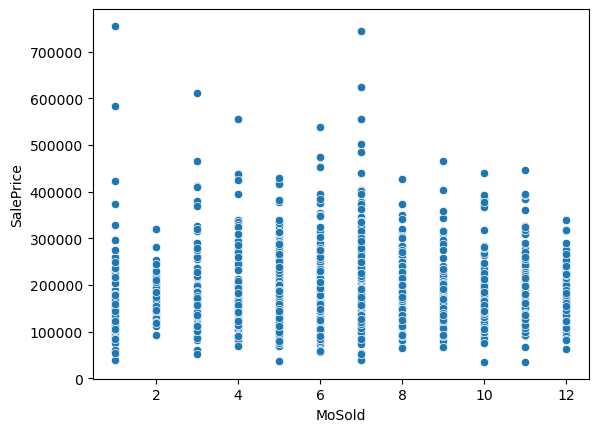

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


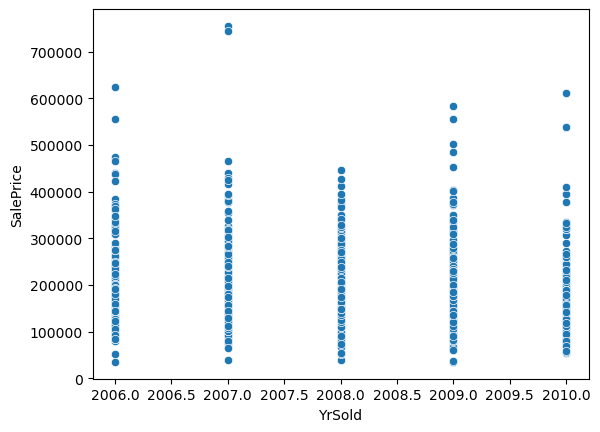

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


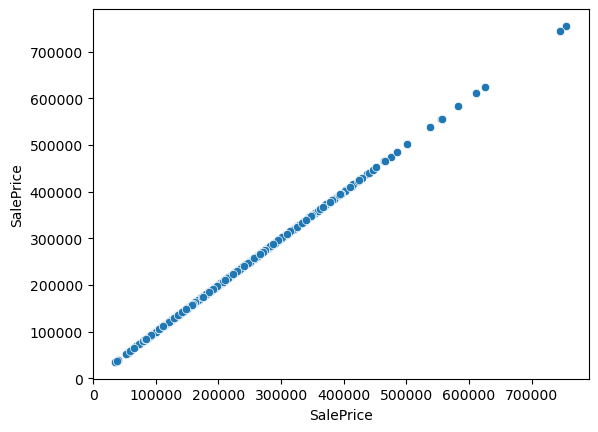

In [30]:
# sns.scatterplot(data["BsmtFinSF1"],data["TotalBsmtSF"])
# sns.scatterplot(data["BsmtFinSF1"],data["SalePrice"])
# sns.scatterplot(data["TotalBsmtSF"],data["SalePrice"])

for i in numeric_cols:
    sns.scatterplot(data[i],data["SalePrice"])
    plt.show()



In [29]:
data[["LowQualFinSF","SalePrice"]].corr()

,LowQualFinSF,SalePrice
LowQualFinSF,1.000000,-0.025606
SalePrice,-0.025606,1.000000


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

val=calc_vif(data[numeric_cols])
print(val)

        variables           VIF
0      MSSubClass  4.897802e+00
1     LotFrontage  2.674326e+01
2         LotArea  2.632063e+00
3     OverallQual  7.668430e+01
4     OverallCond  4.216556e+01
5       YearBuilt  1.777785e+04
6    YearRemodAdd  2.120335e+04
7      MasVnrArea  1.889839e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.735127e+00
17   BsmtHalfBath  1.217262e+00
18       FullBath  2.653677e+01
19       HalfBath  3.419547e+00
20   BedroomAbvGr  3.211341e+01
21   KitchenAbvGr  3.831090e+01
22   TotRmsAbvGrd  8.433869e+01
23     Fireplaces  3.001782e+00
24    GarageYrBlt  3.346372e+01
25     GarageCars  4.082154e+01
26     GarageArea  3.137001e+01
27     WoodDeckSF  1.897788e+00
28    OpenPorchSF  1.825696e+00
29  EnclosedPorch  1.447485e+00
30      

/home/boss/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

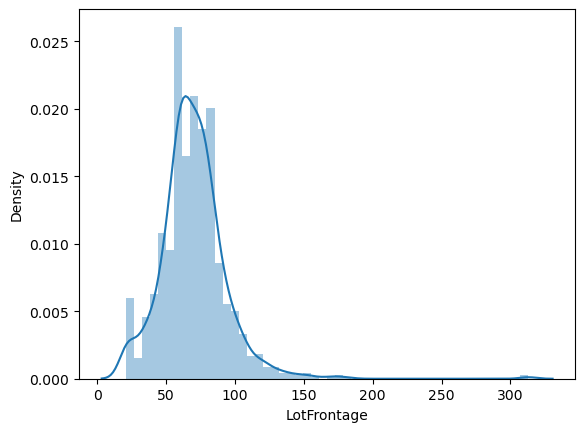

In [27]:
sns.distplot(data.LotFrontage)

In [85]:
val=data.LotFrontage.fillna(data.LotFrontage.median())

In [163]:
sns.boxplot(data.LotFrontage)


/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage', ylabel='MasVnrArea'>

In [164]:

data.LotFrontage.max()

313.0

performing wisorization for fixing outliers

107.0 34.0


In [170]:

sns.displot(data.LotFrontage)

In [171]:
sns.boxplot(data.LotFrontage)

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

In [173]:
sns.displot(data["LotFrontage"])

In [33]:
data["GarageYrBlt"].describe()

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [299]:
for column in data.columns:
    if(data[column].dtypes=='object'):
        print(f'{column}: {data[column].nunique()}')
        

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 6
GarageCond: 6
PavedDrive: 3
SaleType: 9
SaleCondition: 6


In [298]:
for column in test_data.columns:
    if(test_data[column].dtypes=='object'):
        print(f'{column}: {test_data[column].nunique()}')
        

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 1
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 5
BldgType: 5
HouseStyle: 7
RoofStyle: 6
RoofMatl: 4
Exterior1st: 12
Exterior2nd: 15
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 4
HeatingQC: 5
CentralAir: 2
Electrical: 4
KitchenQual: 4
Functional: 7
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 5
GarageCond: 6
PavedDrive: 3
SaleType: 9
SaleCondition: 6


In [177]:
data.Alley.value_counts()

No_Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [96]:
data.MasVnrType.value_counts()

None       871
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [97]:
data[data.MasVnrType=='None'].MasVnrArea.value_counts()

0.0      866
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

In [176]:
data[(data.MasVnrArea>200) & (data.MasVnrType=='None')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.000000,10400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,11,2006,WD,Normal,165150
1300,60,RL,69.243963,10762,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,...,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal,225000
1334,160,RM,34.000000,2368,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal,125000


/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


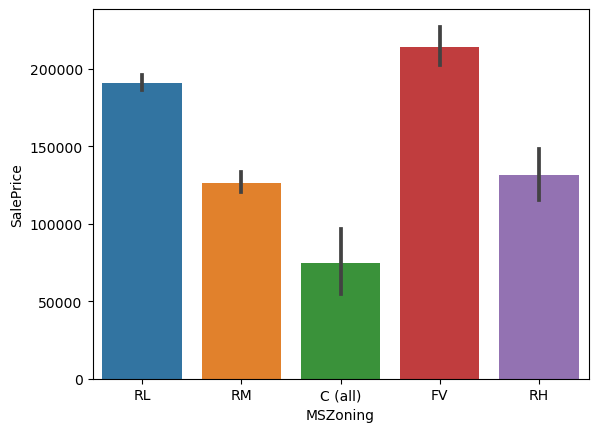

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


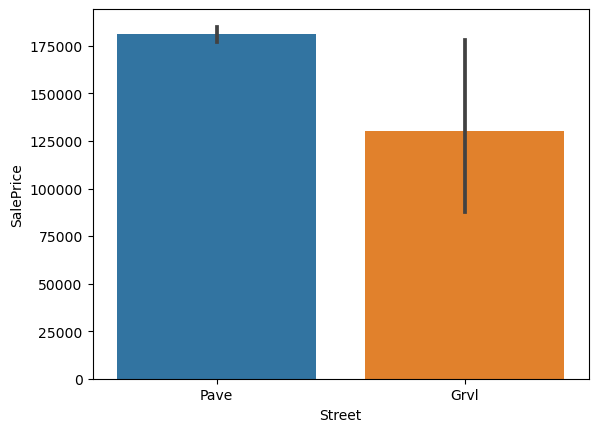

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


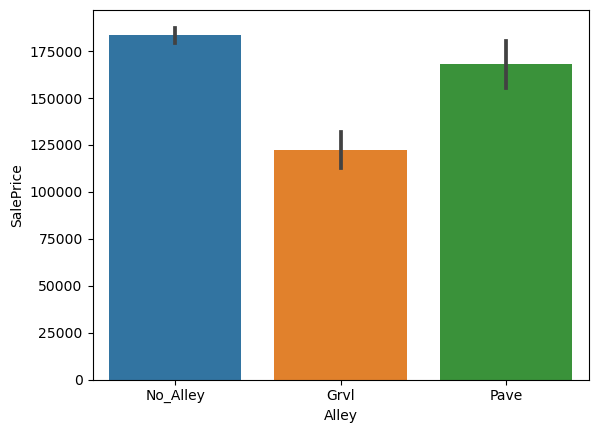

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


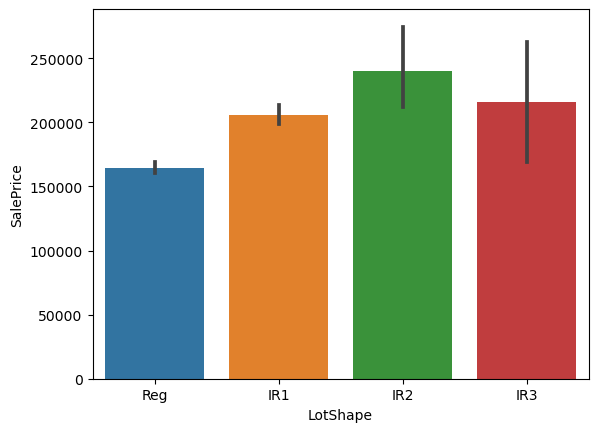

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


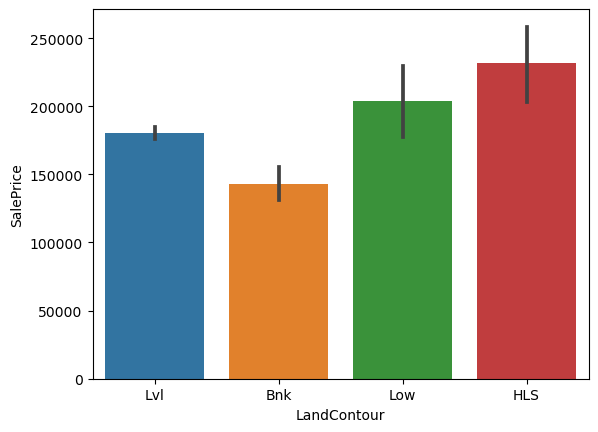

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


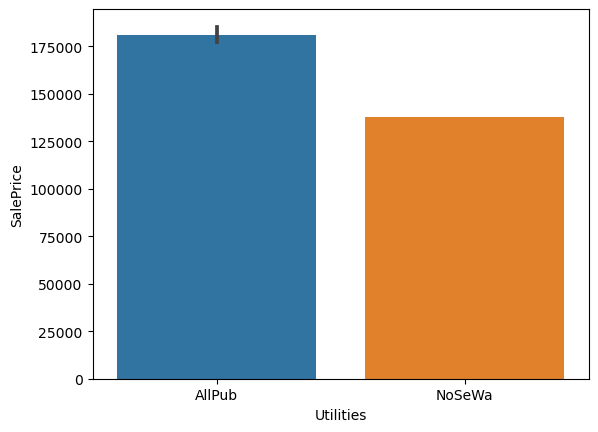

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


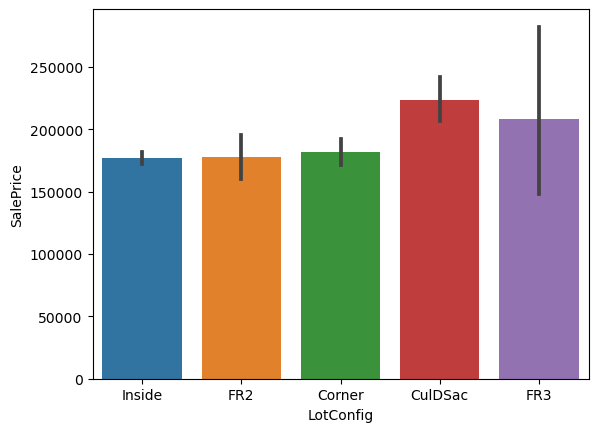

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


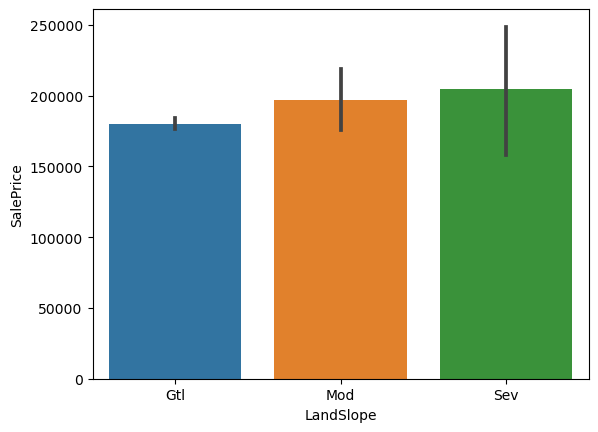

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


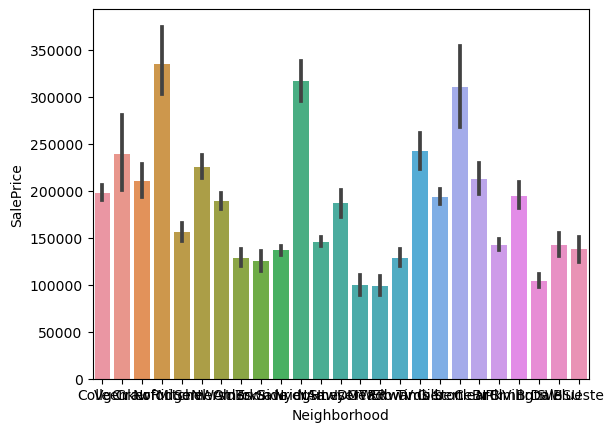

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


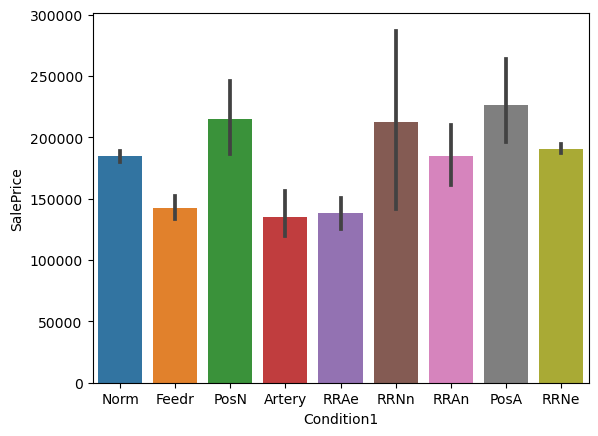

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


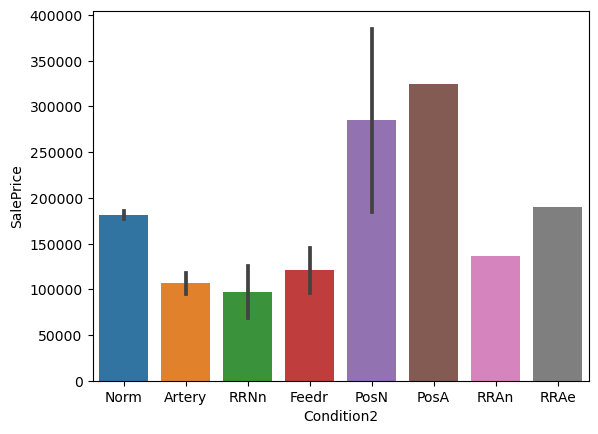

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


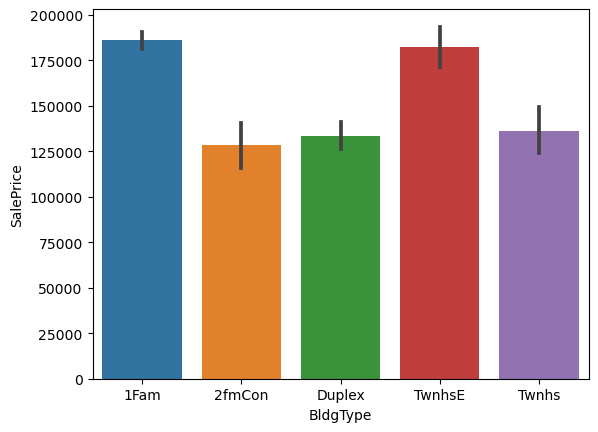

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


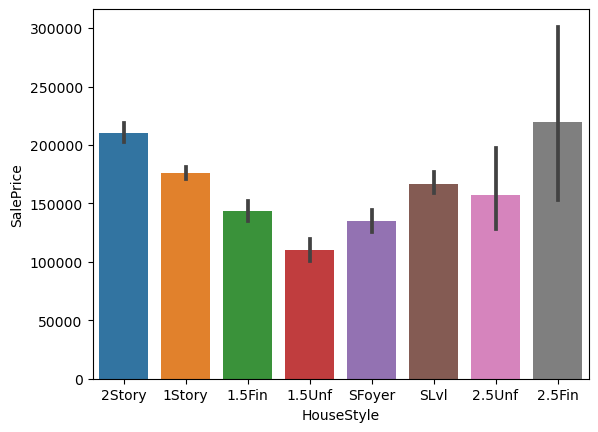

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


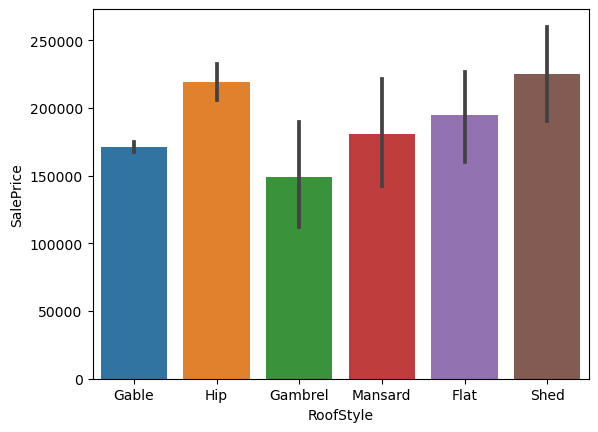

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


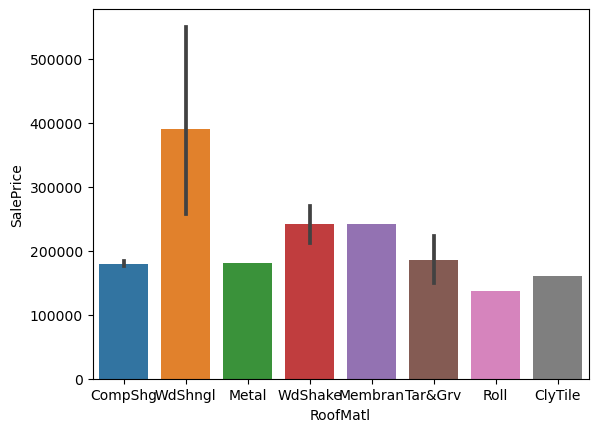

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


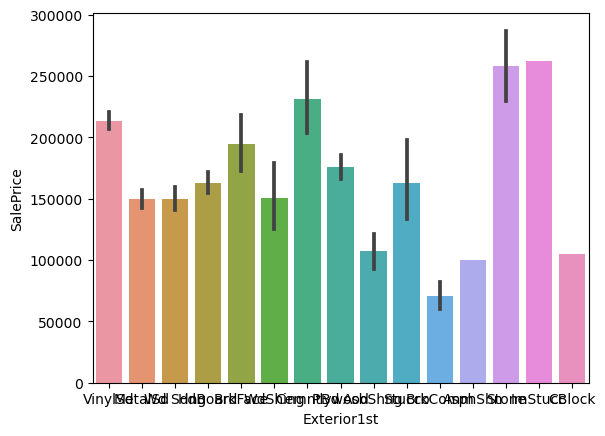

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


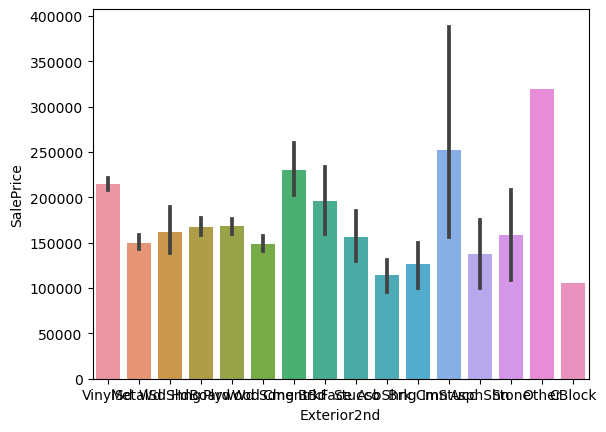

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


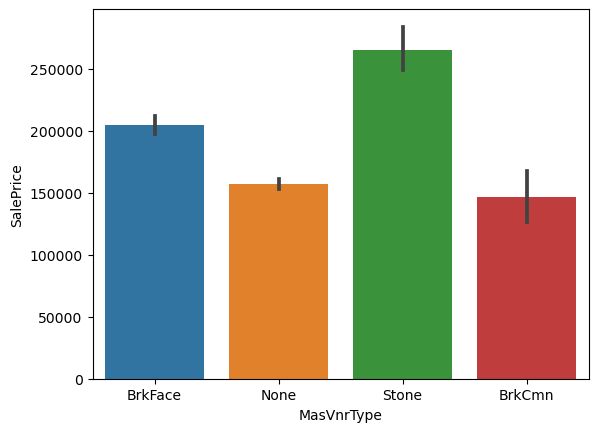

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


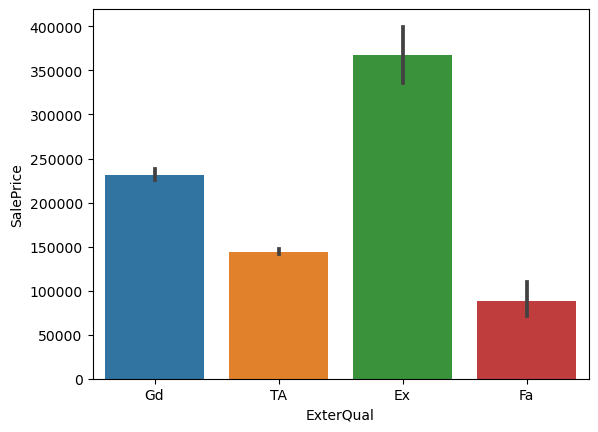

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


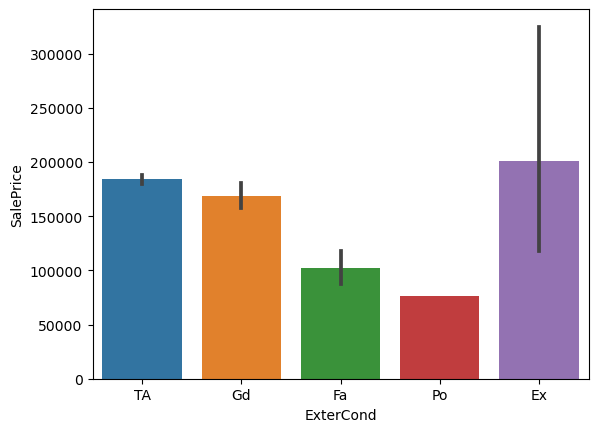

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


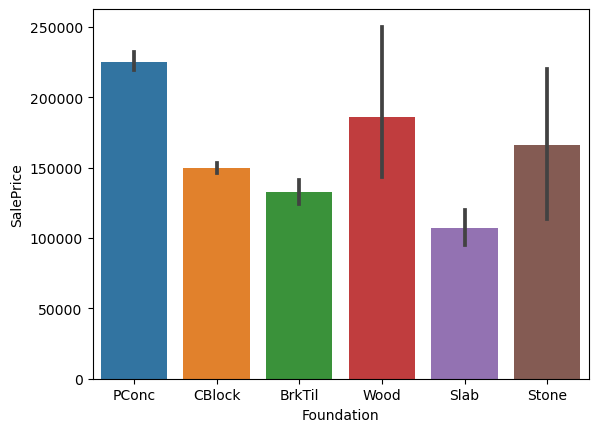

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


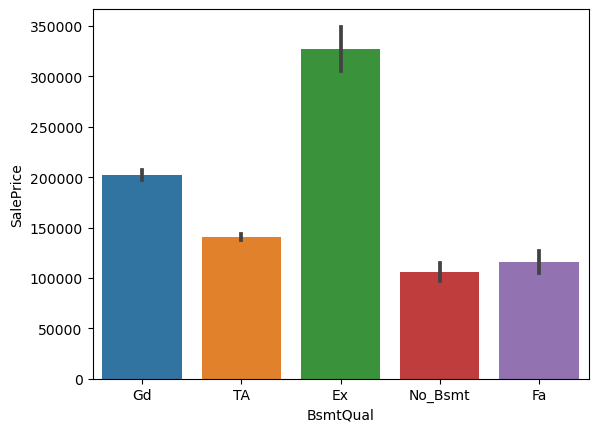

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


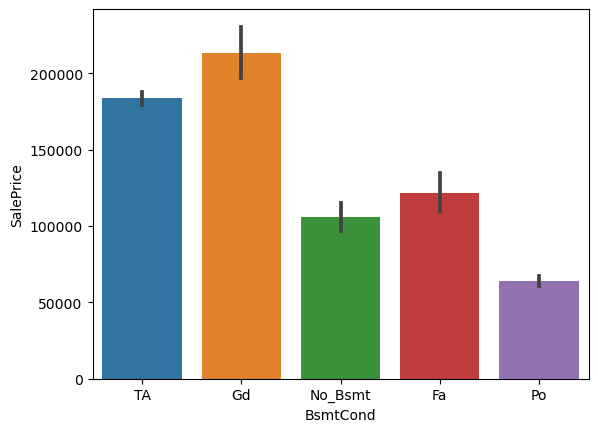

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


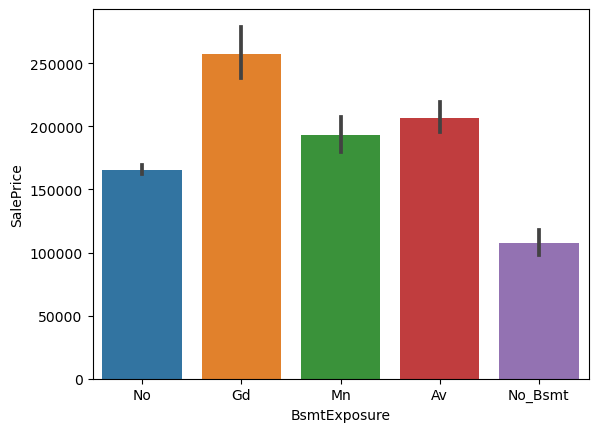

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


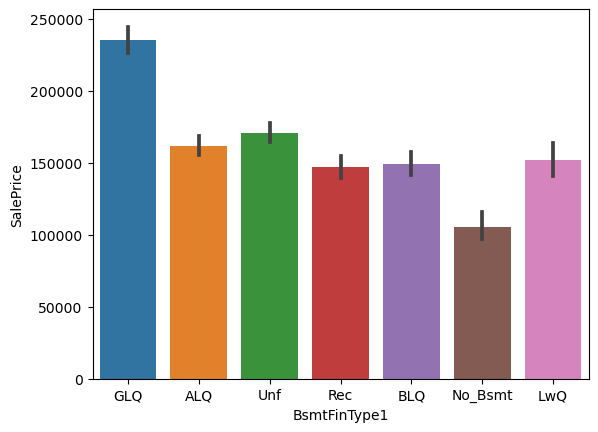

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


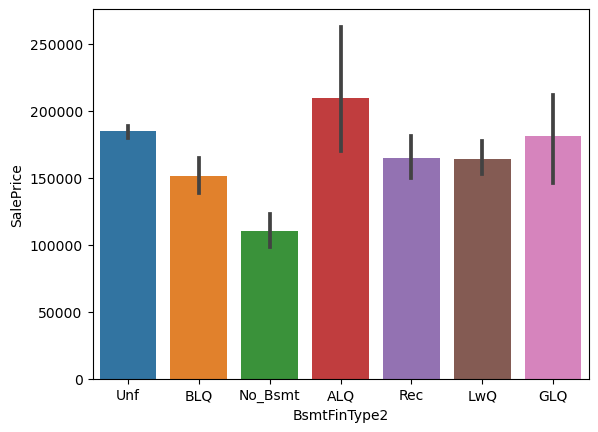

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


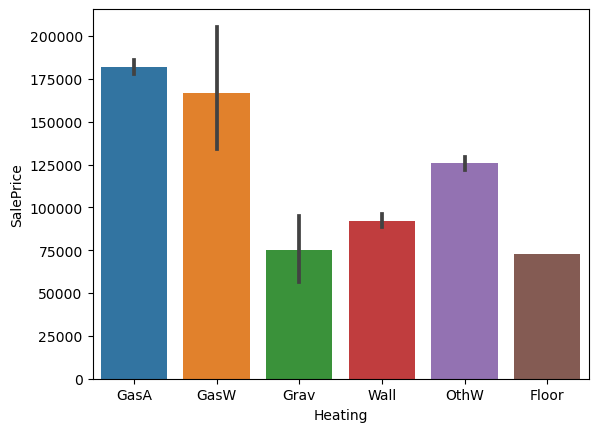

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


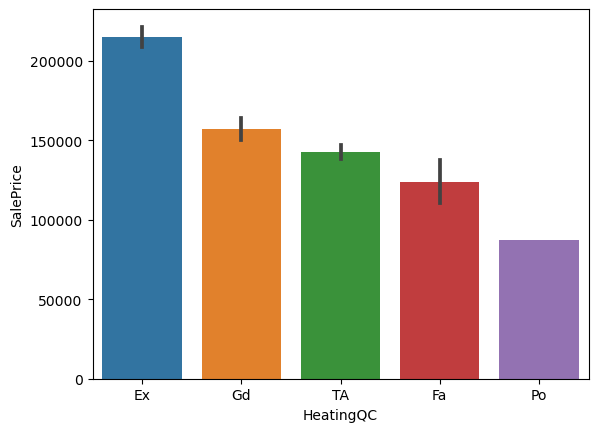

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


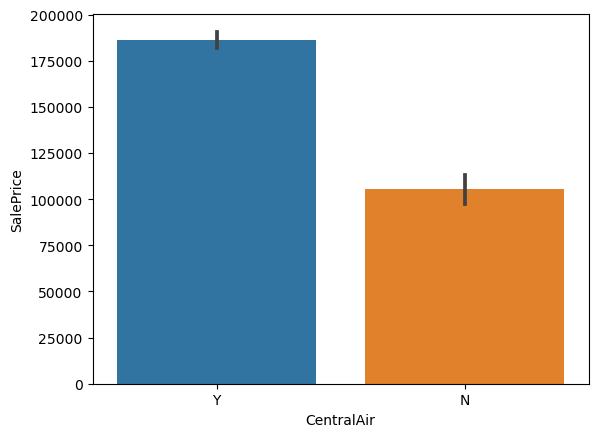

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


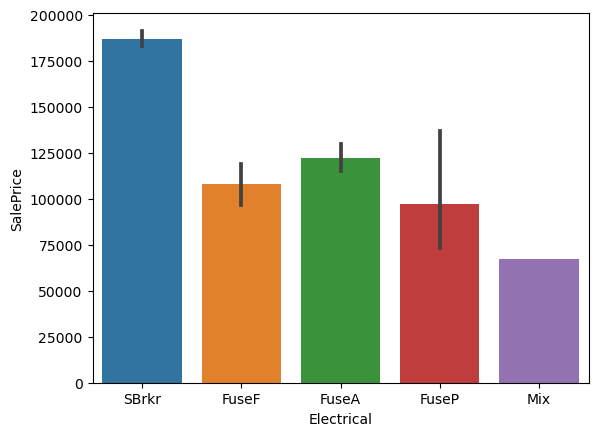

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


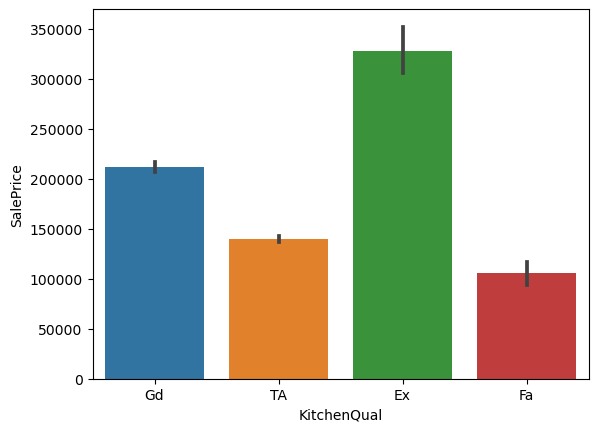

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


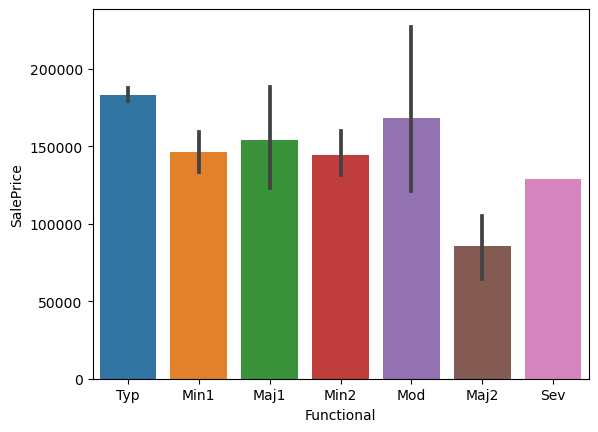

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


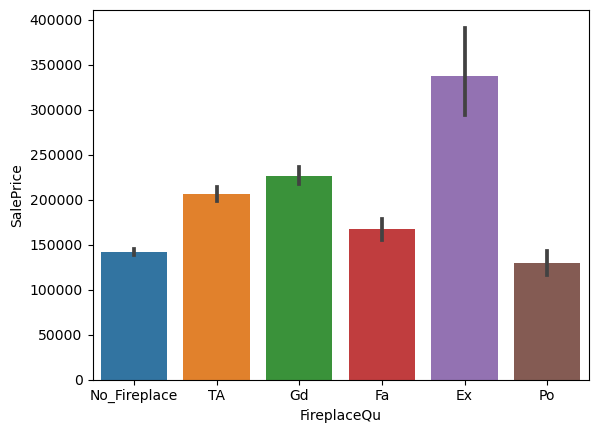

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


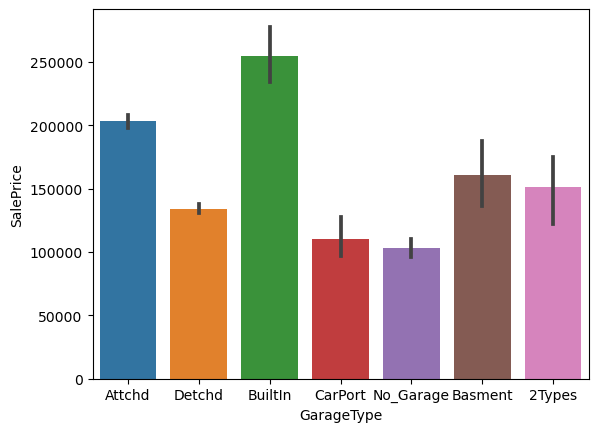

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


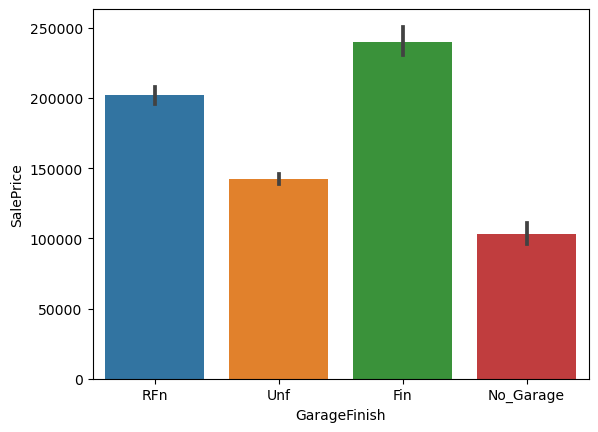

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


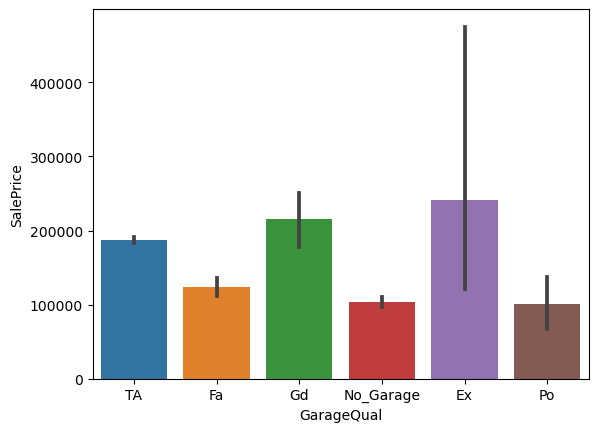

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


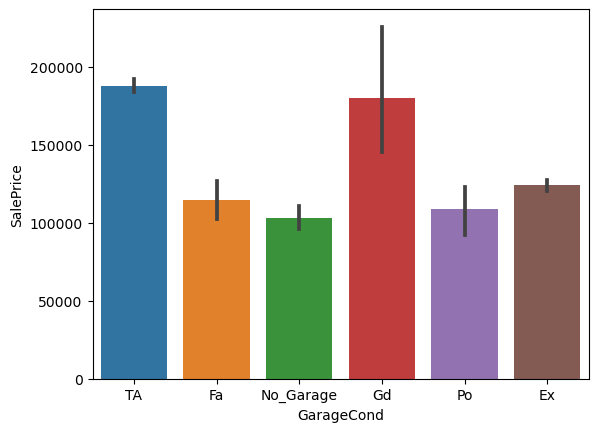

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


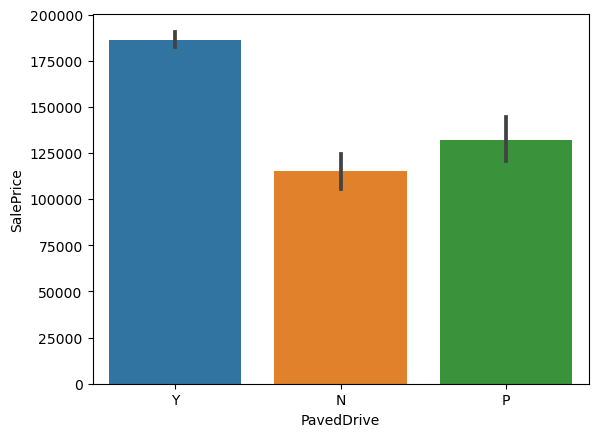

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


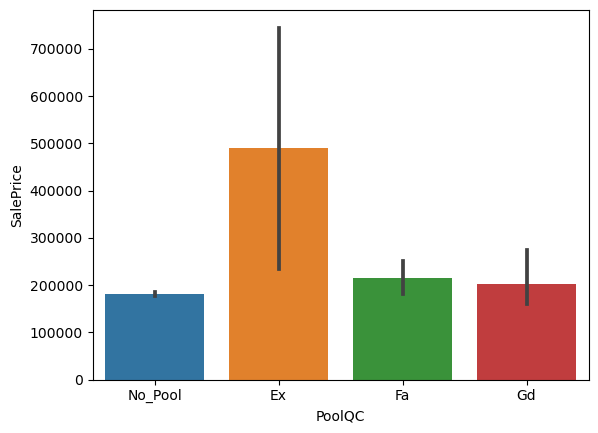

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


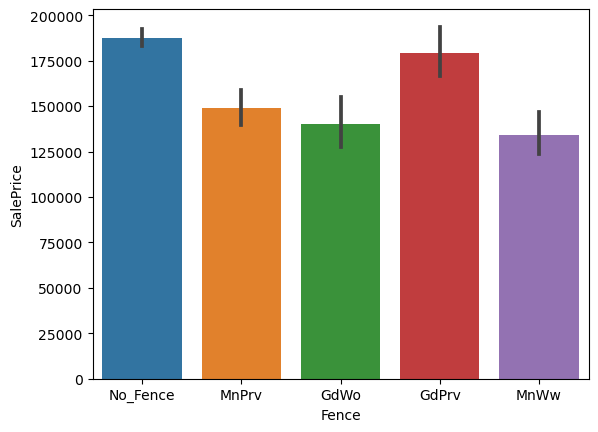

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


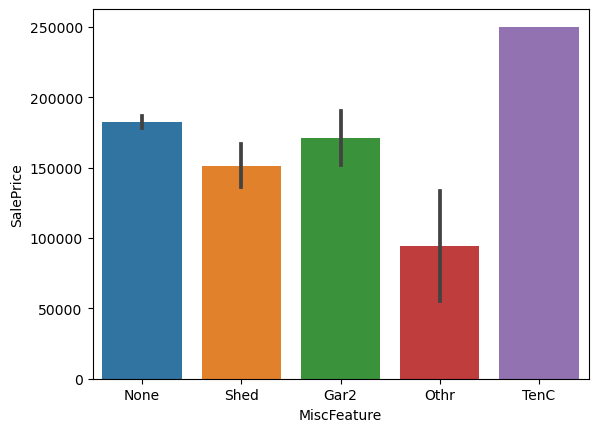

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


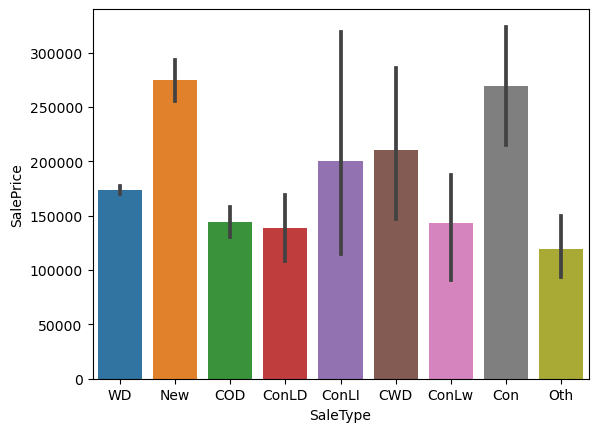

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


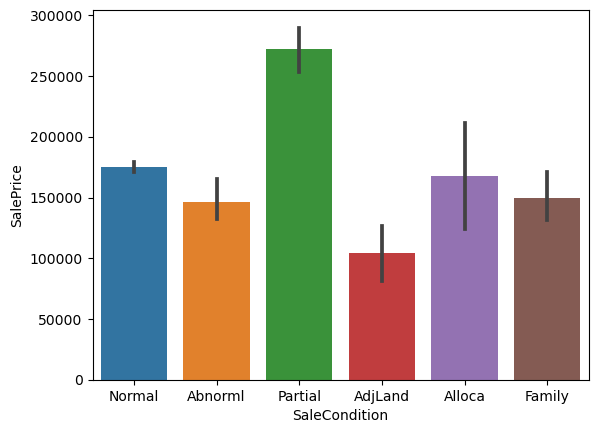

In [181]:
for i in categorical_cols:
    sns.barplot(data[i],data["SalePrice"])
    plt.show()

In [86]:
num_cols=numeric_cols.copy()
lst=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','BsmtFullBath','HalfBath','3SsnPorch','PoolArea','MiscVal']
for i in lst:
    num_cols.remove(i)

In [87]:
# ref_data=data[numeric_cols+categorical_cols]
# data_train = ref_data.sample(frac=0.85,random_state=41)
# data_val = ref_data.drop(data_train.index)
# print(len(data_train))
# print(len(data_val))
dat=data[numeric_cols+categorical_cols]
data_train = dat.sample(frac=0.85,random_state=41)
data_val = dat.drop(data_train.index)
print(len(data_train))
print(len(data_val))
data_train.shape

1241
219


(1241, 76)

In [44]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# from sklearn.ensemble import RandomForestRegressor

2023-08-08 16:25:45.668310: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 16:25:48.017003: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 16:25:48.027480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 16:25:54.243085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [47]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data_train, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data_val, label=label, task = tfdf.keras.Task.REGRESSION)

In [48]:

model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])
model.fit(train_ds)

Use /tmp/tmp41etvb1r as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.398596. Found 1241 examples.
Training model...


[INFO 23-08-08 16:26:22.4097 IST kernel.cc:1243] Loading model from path /tmp/tmp41etvb1r/model/ with prefix 7b6fb2e7e61748e6


Model trained in 0:00:02.224283
Compiling model...


[INFO 23-08-08 16:26:22.7756 IST decision_forest.cc:660] Model loaded with 300 root(s), 117798 node(s), and 71 input feature(s).
[INFO 23-08-08 16:26:22.7756 IST abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-08-08 16:26:22.7757 IST kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [107]:
# tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3)

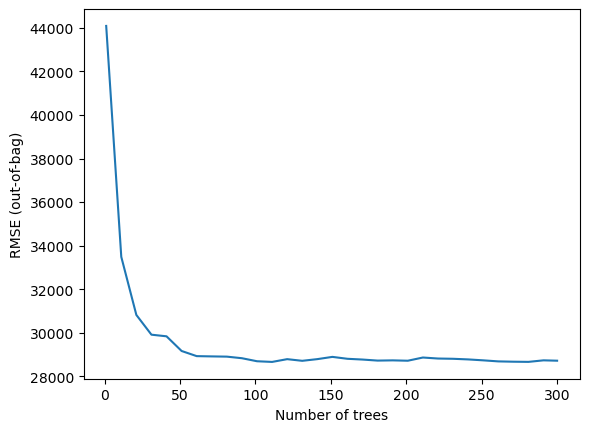

In [49]:

logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [50]:
inspector=model.make_inspector()

In [51]:
inspector.evaluation()

Evaluation(num_examples=1241, accuracy=None, loss=None, rmse=28717.088417679577, ndcg=None, aucs=None, auuc=None, qini=None)

In [52]:
model.evaluate(valid_ds,return_dict=True)

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 894897152.0000


{'loss': 0.0, 'mse': 894897152.0}

In [53]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


In [54]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #59), 107.0),
 ("ExterQual" (4; #21), 64.0),
 ("Neighborhood" (4; #56), 35.0),
 ("GrLivArea" (1; #36), 27.0),
 ("GarageCars" (1; #30), 24.0),
 ("KitchenQual" (4; #42), 16.0),
 ("YearBuilt" (1; #72), 10.0),
 ("BsmtQual" (4; #13), 7.0),
 ("TotalBsmtSF" (1; #69), 3.0),
 ("GarageArea" (1; #29), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("FullBath" (1; #27), 1.0),
 ("GarageFinish" (4; #32), 1.0),
 ("GarageType" (4; #34), 1.0),
 ("GarageYrBlt" (1; #35), 1.0)]

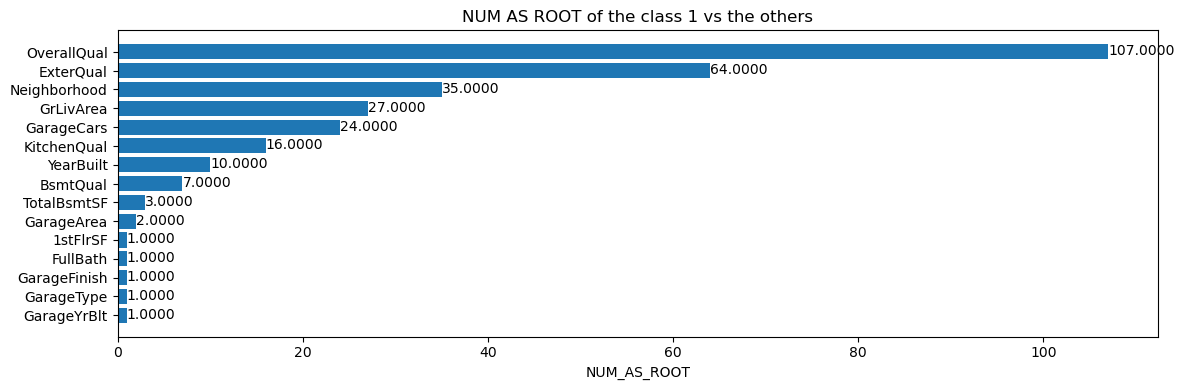

In [55]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 153ms/step


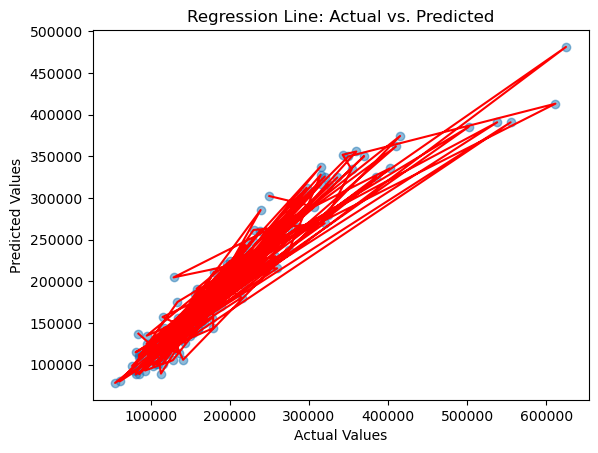

In [130]:
import matplotlib.pyplot as plt

# Assuming you have already trained a regression model and obtained the predicted values
y_true = ...  # Actual target values (ground truth) of the test data
y_pred = ...  # Predicted target values from the regression model

# Create a scatter plot to visualize the predicted vs. actual values
plt.scatter(data_val["SalePrice"],model.predict(valid_ds), alpha=0.5)

# Plot the regression line (y = x) for reference
plt.plot(data_val["SalePrice"],model.predict(valid_ds), color='red')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line: Actual vs. Predicted')

# Show the plot
plt.show()


In [131]:
data_val["SalePrice"]

4       250000
6       307000
23      129900
32      179900
43      130250
         ...  
1425    142000
1428    119000
1445    129000
1448    112000
1453     84500
Name: SalePrice, Length: 219, dtype: int64

In [56]:
test_data=pd.read_csv("/home/boss/Documents/datasets/house-prices-advanced-regression-techniques/test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [57]:
test_da=tfdf.keras.pd_dataframe_to_tf_dataset(test_data,task=tfdf.keras.Task.REGRESSION)

In [58]:
ypred=model.predict(test_da)

2/2 [==============================] - 1s 18ms/step


In [63]:
ypred

array([[124598.766],
       [152498.25 ],
       [179910.95 ],
       ...,
       [155445.12 ],
       [123124.47 ],
       [200644.58 ]], dtype=float32)

In [125]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
def preprocess(dat,cat_var,nvar):
    onehot=OneHotEncoder()
    onehotcateg_cols=onehot.fit_transform(dat[cat_var])
    onehotcateg_cols=onehotcateg_cols.toarray()
  
    num_columns = onehotcateg_cols.shape[1]
    print(num_columns)
    column_names = [f"dummy{i}" for i in range(num_columns)]

    newcat=pd.DataFrame(onehotcateg_cols,columns=column_names)
    newdata=dat.copy()
    df = pd.concat([newdata, newcat], axis=1)

    df.drop(cat_var, axis=1, inplace=True)
    yrlist=['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd']
    for i in yrlist:
        nvar.remove(i)

    for i in yrlist:
        df[i]=df[i].max()-df[i]
    if('SalePrice' in nvar):
        nvar.remove('SalePrice')
        
    st=StandardScaler()
    df[nvar]=st.fit_transform(df[nvar])

    return df
x=preprocess(data.copy(),categorical_cols.copy(),numeric_cols.copy())


250


In [126]:



y=x["SalePrice"].tolist()

x=x.drop("SalePrice",axis=1)

In [187]:
# onehot=OneHotEncoder()
# onehotcateg_cols=onehot.fit_transform(data[categorical_cols])

In [188]:
# onehotcateg_cols=onehotcateg_cols.toarray()

In [189]:

# num_columns = onehotcateg_cols.shape[1]
# column_names = [f"dummy{i}" for i in range(num_columns)]

# newcat=pd.DataFrame(onehotcateg_cols,columns=column_names)

In [190]:
# onehotcateg_cols.shape

(1460, 250)

In [191]:
# newdata=data.copy()
# df = pd.concat([newdata, newcat], axis=1)

# df.drop(categorical_cols, axis=1, inplace=True)

In [192]:
# yrlist=['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd']
# for i in yrlist:
#     numeric_cols.remove(i)

In [193]:
# yrlist=['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd']
# for i in yrlist:
#     df[i]=df[i].max()-df[i]

In [194]:
# st=StandardScaler()
# df[numeric_cols]=st.fit_transform(df[numeric_cols])



# df.drop("SalePrice",axis=1)
# x=df.copy()
# # data_val.drop("SalePrice",axis=1)


In [137]:
# y=df["SalePrice"].tolist()
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load your dataset here
# dataset = pd.read_csv('your_data.csv')

# Add a constant column (intercept)
# X = sm.add_constant(.drop('target_column', axis=1))
# y = dataset['target_column']

# Step 1: Build the Full Model
model = sm.OLS(y, x).fit()

# Step 2: Fit and Evaluate
print(model.summary())

# Step 3-5: Backward Elimination
while model.pvalues.max() > 0.02:
    max_pvalue_feature = model.pvalues.idxmax()
    x = x.drop(max_pvalue_feature, axis=1)
    model = sm.OLS(y, x).fit()

# Final Model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:10:23   Log-Likelihood:                -16589.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1220   BIC:                         3.493e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -1265.0961   3501.039     -0.361

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     288.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:10:41   Log-Likelihood:                -16699.
No. Observations:                1460   AIC:                         3.351e+04
Df Residuals:                    1403   BIC:                         3.381e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea       5475.5540    853.915      6.412   

In [138]:
x.shape

(1460, 57)

In [94]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [232]:
pca = PCA(n_components=70)  # You can choose the number of components you want to retain
pca_train = pca.fit_transform(x)


In [252]:
variance_explained = pca.explained_variance_ratio_
x.shape

(1460, 286)

In [139]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.85,random_state=41)

In [140]:
X_test.shape

(1241, 57)

In [141]:
import xgboost as xgb

In [159]:
regress=xgb.XGBRegressor(n_estimators=150)
regress.fit(X_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [160]:
yscore=cross_val_score(regress,X_test,y_test,scoring="neg_mean_squared_error",cv=3)

In [161]:
tree_rmse_scores = np.sqrt(-yscore)
tree_rmse_scores

array([29096.51686935, 33412.57558006, 30498.28169045])

In [162]:
val=regress.predict(X_train)
final_mse = mean_squared_error(y_train, val)
final_rmse = np.sqrt(final_mse)

In [163]:
final_rmse

36680.64994820688

In [164]:
final_mse

1345470080.6228895

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
rgbregress=RandomForestRegressor()


In [150]:
rgbregress.fit(X_train,y_train)

RandomForestRegressor()

In [152]:
yscore=cross_val_score(rgbregress,X_test,y_test,scoring="neg_mean_squared_error",cv=3)

In [153]:
tree_rmse_scores = np.sqrt(-yscore)
tree_rmse_scores

array([27590.07752   , 32112.68829695, 33329.12290317])

In [154]:
val=rgbregress.predict(X_train)
final_mse = mean_squared_error(y_train, val)
final_rmse = np.sqrt(final_mse)

In [165]:
final_rmse,final_mse

(36680.64994820688, 1345470080.6228895)

In [156]:
# rgbregress.get_params()

In [157]:
# regress.get_params()

In [166]:
from sklearn.linear_model import LinearRegression

In [168]:
pred=LinearRegression()

In [169]:
a=pred.fit(X_test,y_test)

In [171]:
val=rgbregress.predict(X_train)
final_mse = mean_squared_error(y_train, val)
final_rmse = np.sqrt(final_mse)
final_rmse,final_mse

(12687.383733305835, 160969705.99615347)

In [92]:
# cumulative_variance_explained = np.cumsum(variance_explained)

# # Plot the variance explained by each principal component
# plt.figure(figsize=(8, 6))
# plt.bar(range(1, 70 + 1), variance_explained, alpha=0.8)
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Scree Plot - Variance Explained by Each Principal Component')
# plt.show()

# # Plot the cumulative explained variance
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 70 + 1), cumulative_variance_explained, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Variance Explained')
# plt.title('Cumulative Explained Variance')
# plt.show()




In [383]:
Tnumeric_cols=[x for x in test_data.columns.tolist() if test_data[x].dtype!='object']
Tcategorical_cols=[x for x in test_data.columns.tolist() if test_data[x].dtype=='object']
len(Tcategorical_cols),len(categorical_cols)

(39, 39)

In [384]:
X=preprocess(test_data.copy(),Tcategorical_cols.copy(),Tnumeric_cols.copy())


232


In [281]:
x.shape,X.shape

((1460, 286), (1447, 268))

In [287]:
list1=x.columns.tolist()
list2=X.columns.tolist()

for i in x:
    if i not in X:
        print(i)

for i in X:
    if i not in x:
        print(i)



268

In [258]:
# pc_test = pca.transform(X.copy())

/home/boss/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- dummy232
- dummy233
- dummy234
- dummy235
- dummy236
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 268 features, but PCA is expecting 286 features as input.

In [319]:
val=rgbregress.predict(X)
final_mse = mean_squared_error(Y_val, val)
final_rmse = np.sqrt(final_mse)
print(final_rmse,final_mse)

/home/boss/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- dummy232
- dummy233
- dummy234
- dummy235
- dummy236
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 268 features, but RandomForestRegressor is expecting 286 features as input.